# 2.0 Quantum Weirdness
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$

In [8]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram

import matplotlib.pyplot as plt
import numpy as np

{'011': 263, '101': 262, '000': 249, '110': 250}


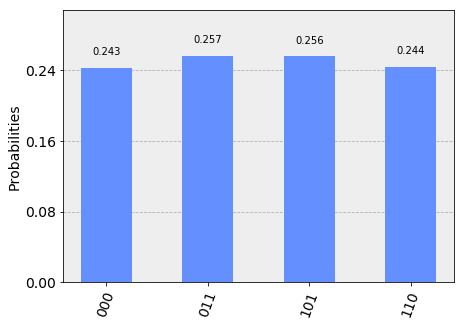

In [10]:
# Build Circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.cx(q[0], q[2])

# #local operations
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.s(q[0])
qc.s(q[1])
qc.s(q[2])

# # # Measurement 1
qc.barrier()
qc.z(q[0])
qc.z(q[1])
qc.z(q[2])

# # Measurement 2
# qc.barrier()
# qc.z(q[0])
# qc.h(q[1])
# qc.h(q[2])

# # Measurement 3
# qc.barrier()
# qc.h(q[0])
# qc.z(q[1])
# qc.h(q[2])

# Measurement 4
# qc.barrier()
# qc.h(q[0])
# qc.h(q[1])
# qc.z(q[2])

qc.measure(q, c)

# Load backend QasmSimulator and run the job
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()

# get the counts (how many events in each bin)
counts = result.get_counts(qc)
print(counts)

# plot
plot_histogram(counts)

In [3]:
qc.draw()